In [1]:
#Date:09-06-2022
#Name: Domala Vamshikrishna
#Model: Significant wave height prediction with LSTM
#multivariate analysis
 #Dropout: 60%, Nodes: 32

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional

C:\Users\Domala\AppData\Roaming\Python\Python38\site-packages\requests\__init__.py:78: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({0}) or chardet ({1}) doesn't match a supported "


In [3]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import medfilt

In [4]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from numpy import array

In [6]:
dataset=pd.read_excel(r"51000_Final.xlsx")

In [7]:
dataset

,Date,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP
0,2015-08-20 21:00:00,117,5.6,6.4,1.71,9.09,6.63,58,1015.7,26.4,26.6
1,2015-08-20 22:00:00,117,5.1,6.0,1.68,10.00,6.54,82,1015.5,26.3,26.7
2,2015-08-20 23:00:00,111,3.5,4.3,1.76,9.09,6.80,58,1015.1,26.3,26.8
3,2015-08-21 00:00:00,111,4.4,5.2,1.82,8.33,7.10,49,1014.4,26.4,27.0
4,2015-08-21 01:00:00,100,5.7,7.0,1.64,9.09,6.90,56,1014.1,26.6,26.9
...,...,...,...,...,...,...,...,...,...,...,...
55798,2021-12-31 19:00:00,99,10.3,13.8,3.02,9.09,6.56,62,1015.0,22.7,23.4
55799,2021-12-31 20:00:00,100,11.1,14.2,2.96,7.14,6.45,86,1014.9,22.8,23.4
55800,2021-12-31 21:00:00,104,11.1,13.9,2.92,10.00,6.41,46,1014.1,22.8,23.4
55801,2021-12-31 22:00:00,109,11.3,14.1,2.89,8.33,6.31,78,1013.1,22.8,23.4


In [8]:
dataset['Date']=pd.to_datetime(dataset['Date'])

In [9]:
split_date="31/12/2020 11:40:00 PM"

In [10]:
data=dataset[["Date","WSPD","GST","WVHT","DPD","APD","MWD"]]

In [11]:
train=data.loc[data.Date <= split_date].copy()
test=data.loc[data.Date > split_date].copy()

In [12]:
train

,Date,WSPD,GST,WVHT,DPD,APD,MWD
0,2015-08-20 21:00:00,5.6,6.4,1.71,9.09,6.63,58
1,2015-08-20 22:00:00,5.1,6.0,1.68,10.00,6.54,82
2,2015-08-20 23:00:00,3.5,4.3,1.76,9.09,6.80,58
3,2015-08-21 00:00:00,4.4,5.2,1.82,8.33,7.10,49
4,2015-08-21 01:00:00,5.7,7.0,1.64,9.09,6.90,56
...,...,...,...,...,...,...,...
47038,2020-12-31 19:00:00,6.4,8.9,3.39,14.81,8.17,308
47039,2020-12-31 20:00:00,7.2,10.3,3.18,14.81,8.15,291
47040,2020-12-31 21:00:00,7.3,9.1,3.03,14.81,8.16,289
47041,2020-12-31 22:00:00,7.9,9.7,3.19,14.81,8.31,285


In [13]:
df2_train=train[["WSPD","GST","DPD","APD","MWD"]]
df2_date=train[['Date']]
df2_train.head()

,WSPD,GST,DPD,APD,MWD
0,5.6,6.4,9.09,6.63,58
1,5.1,6.0,10.00,6.54,82
2,3.5,4.3,9.09,6.80,58
3,4.4,5.2,8.33,7.10,49
4,5.7,7.0,9.09,6.90,56


In [14]:
df2_test=test[["WSPD","GST","DPD","APD","MWD"]]
df2_date_test=test[['Date']]
df2_test.head()

,WSPD,GST,DPD,APD,MWD
47043,6.7,9.6,17.39,8.29,328
47044,7.4,9.5,19.05,8.35,298
47045,7.7,9.6,17.39,8.31,336
47046,7.6,10.0,16.00,8.85,320
47047,8.1,10.1,17.39,9.08,321


In [15]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc=StandardScaler()
df2_train_scaled=sc.fit_transform(df2_train)
df2_train_scaled.shape


(47043, 5)

In [16]:
df2_train_scaled

array([[-0.50316553, -0.73463808, -0.55538759, -0.32404456, -0.95114554],
       [-0.70790105, -0.87605097, -0.23520739, -0.3926551 , -0.74779175],
       [-1.36305474, -1.47705577, -0.55538759, -0.19444686, -0.95114554],
       ...,
       [ 0.19293526,  0.21989896,  1.45717366,  0.84233471,  1.0061347 ],
       [ 0.43861789,  0.4320183 ,  1.45717366,  0.95668562,  0.9722424 ],
       [ 1.21661289,  1.24514244,  1.45717366,  0.7279838 ,  1.26032694]])

In [17]:
df2_train_scaled_y=sc.fit_transform(train[['WVHT']])
print(df2_train_scaled_y.shape)
df2_train_scaled_y

(47043, 1)


array([[-0.77666117],
       [-0.81484077],
       [-0.71302852],
       ...,
       [ 0.90324096],
       [ 1.10686546],
       [ 0.90324096]])

In [18]:
df2_test_scaled=sc.fit_transform(df2_test)
df2_test_scaled.shape

(8760, 5)

In [19]:
df2_test_scaled_y=sc.fit_transform(test[['WVHT']])
print(df2_test_scaled_y.shape)
df2_test_scaled_y

(8760, 1)


array([[1.12484068],
       [0.92238084],
       [1.13930209],
       ...,
       [0.92238084],
       [0.87899659],
       [0.93684226]])

In [20]:
time_step=24
X_train=[]
y_train=[]
for i in range(24, len(train)):
    X_train.append(df2_train_scaled[i-24:i])
    y_train.append(df2_train_scaled_y[i][0])
X_train, y_train=np.array(X_train),np.array(y_train)
    
print(X_train.shape)
print(y_train.shape)

(47019, 24, 5)
(47019,)


In [21]:
print(X_train.shape), print(y_train.shape)

(47019, 24, 5)
(47019,)


(None, None)

In [22]:
time_step=24
X_test=[]
y_test=[]
for i in range(24, len(test)):
    X_test.append(df2_test_scaled[i-24:i])
    y_test.append(df2_test_scaled_y[i][0])
X_test, y_test=np.array(X_test),np.array(y_test)
    
print(X_test.shape)
print(y_test.shape)

(8736, 24, 5)
(8736,)


In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] ,X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , X_test.shape[2])

In [24]:
X_train.shape

(47019, 24, 5)

In [25]:
X_test.shape

(8736, 24, 5)

In [26]:
#LSTM model with 3 hidden layers and 32 nodes with drop out regulisation 60%
from keras.layers import Dropout
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(24,5)))
model.add(Dropout(0.6))
model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.6))
model.add(LSTM(32))
model.add(Dropout(0.6))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 32)            4864      
_________________________________________________________________
dropout (Dropout)            (None, 24, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 32)            8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [28]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
735/735 [==============================] - 22s 23ms/step - loss: 0.3578 - val_loss: 0.1237
Epoch 2/50
735/735 [==============================] - 14s 19ms/step - loss: 0.1904 - val_loss: 0.1320
Epoch 3/50
735/735 [==============================] - 14s 19ms/step - loss: 0.1747 - val_loss: 0.1131
Epoch 4/50
735/735 [==============================] - 14s 19ms/step - loss: 0.1652 - val_loss: 0.1331
Epoch 5/50
735/735 [==============================] - 14s 19ms/step - loss: 0.1526 - val_loss: 0.1126
Epoch 6/50
735/735 [==============================] - 14s 19ms/step - loss: 0.1530 - val_loss: 0.1164
Epoch 7/50
735/735 [==============================] - 14s 19ms/step - loss: 0.1540 - val_loss: 0.1116
Epoch 8/50
735/735 [==============================] - 14s 19ms/step - loss: 0.1477 - val_loss: 0.0981
Epoch 9/50
735/735 [==============================] - 14s 19ms/step - loss: 0.1467 - val_loss: 0.1015
Epoch 10/50
735/735 [==============================] - 14s 19ms/step - loss: 0.143

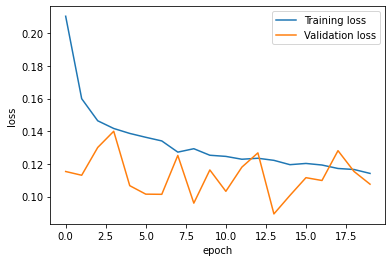

In [29]:
#####

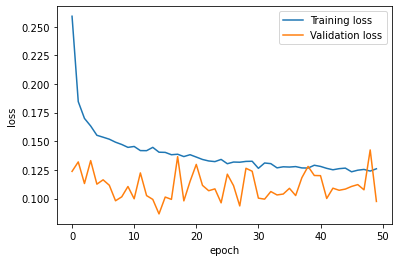

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("epoch")
plt.ylabel("loss")

plt.legend()

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
##Transformback to original form
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error


In [33]:
df1=pd.read_excel("51000_Final.xlsx")

In [34]:
y_pred=pd.DataFrame(test_predict)
y_pred.columns=['y_pred']
y_pred


,y_pred
0,3.973368
1,4.080570
2,4.148874
3,3.873354
4,3.689748
...,...
8731,2.765409
8732,2.823342
8733,2.894006
8734,2.933863


In [35]:
fully_final=pd.concat((y_pred,df2_test), axis=1 )
#"WSPD","GST","WVHT","DPD","APD","MWD"
fully_final=fully_final[["WSPD","GST","y_pred","DPD","APD","MWD"]]
fully_final

,WSPD,GST,y_pred,DPD,APD,MWD
0,NaN,NaN,3.973368,NaN,NaN,NaN
1,NaN,NaN,4.080570,NaN,NaN,NaN
2,NaN,NaN,4.148874,NaN,NaN,NaN
3,NaN,NaN,3.873354,NaN,NaN,NaN
4,NaN,NaN,3.689748,NaN,NaN,NaN
...,...,...,...,...,...,...
55798,10.3,13.8,NaN,9.09,6.56,62.0
55799,11.1,14.2,NaN,7.14,6.45,86.0
55800,11.1,13.9,NaN,10.00,6.41,46.0
55801,11.3,14.1,NaN,8.33,6.31,78.0


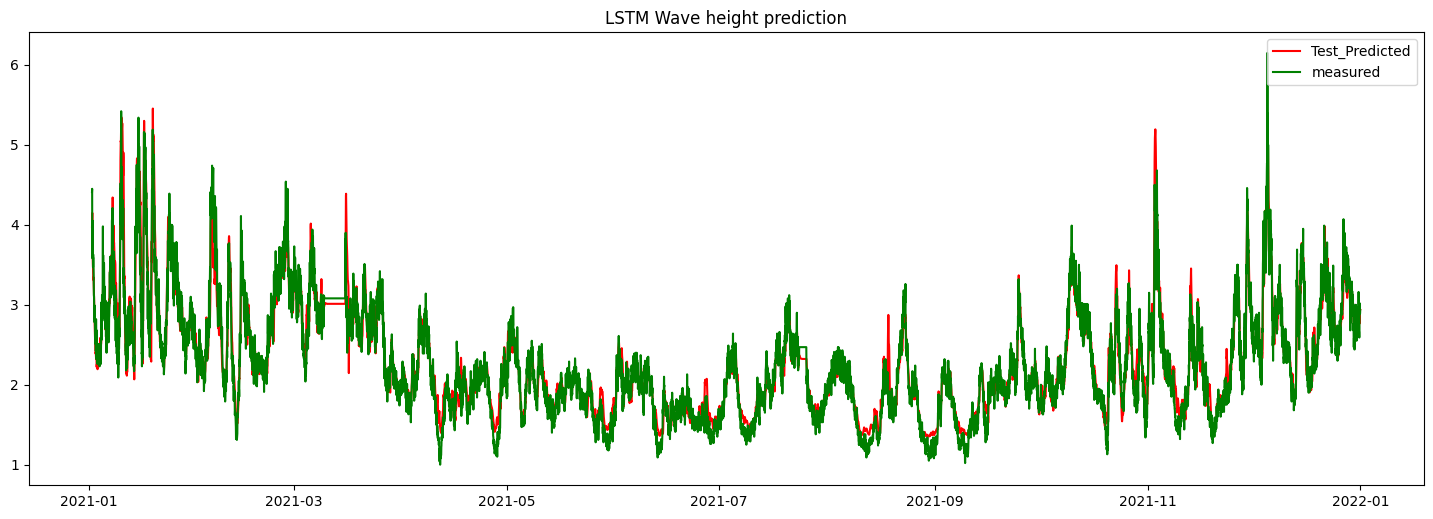

In [36]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df2_date_test[24:],y_pred, label='Test_Predicted', color='red')
plt.plot(df2_date_test[24:], test['WVHT'][24:], label='measured', color='green')
plt.title("LSTM Wave height prediction")
plt.legend(loc='upper right')
plt.show()

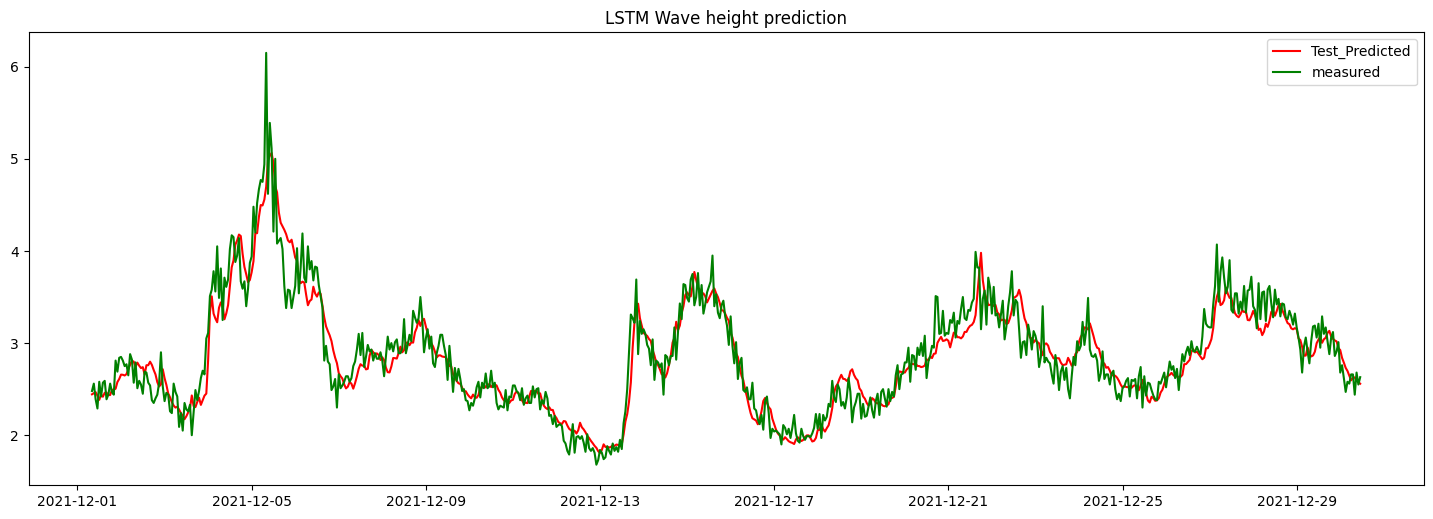

In [37]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df2_date_test[8024:8724],y_pred[8000:8700], label='Test_Predicted', color='red')
plt.plot(df2_date_test[8024:8724], test['WVHT'][8024:8724], label='measured', color='green')
plt.title("LSTM Wave height prediction")
plt.legend(loc='upper right')
plt.show()

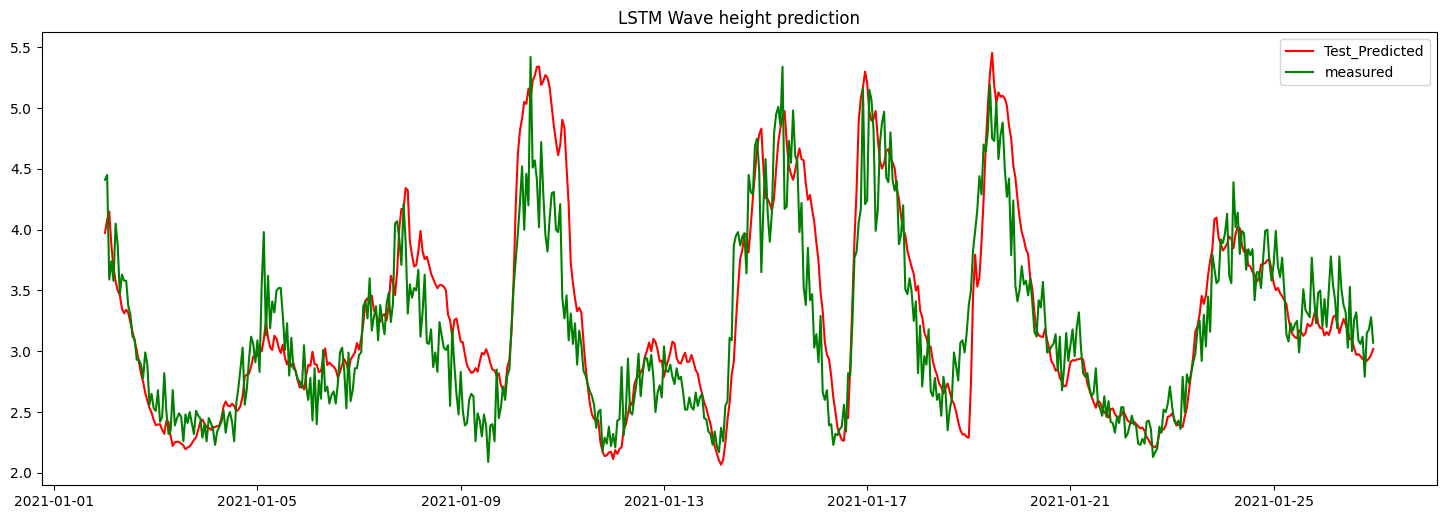

In [38]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df2_date_test[24:624],y_pred[0:600], label='Test_Predicted', color='red')
plt.plot(df2_date_test[24:624], test['WVHT'][24:624], label='measured', color='green')
plt.title("LSTM Wave height prediction")
plt.legend(loc='upper right')
plt.show()

In [39]:
r2_score(test['WVHT'][24:],y_pred)

0.9016445012045107

In [40]:
r2_score(train['WVHT'][24:],train_predict)

0.8926019526624929

In [41]:
y_train_pred=pd.DataFrame(train_predict)
y_train_pred.columns=['y_train_pred']
y_train_pred


,y_train_pred
0,1.822585
1,1.811199
2,1.772122
3,1.744464
4,1.710662
...,...
47014,2.994104
47015,2.930639
47016,2.887481
47017,2.848773


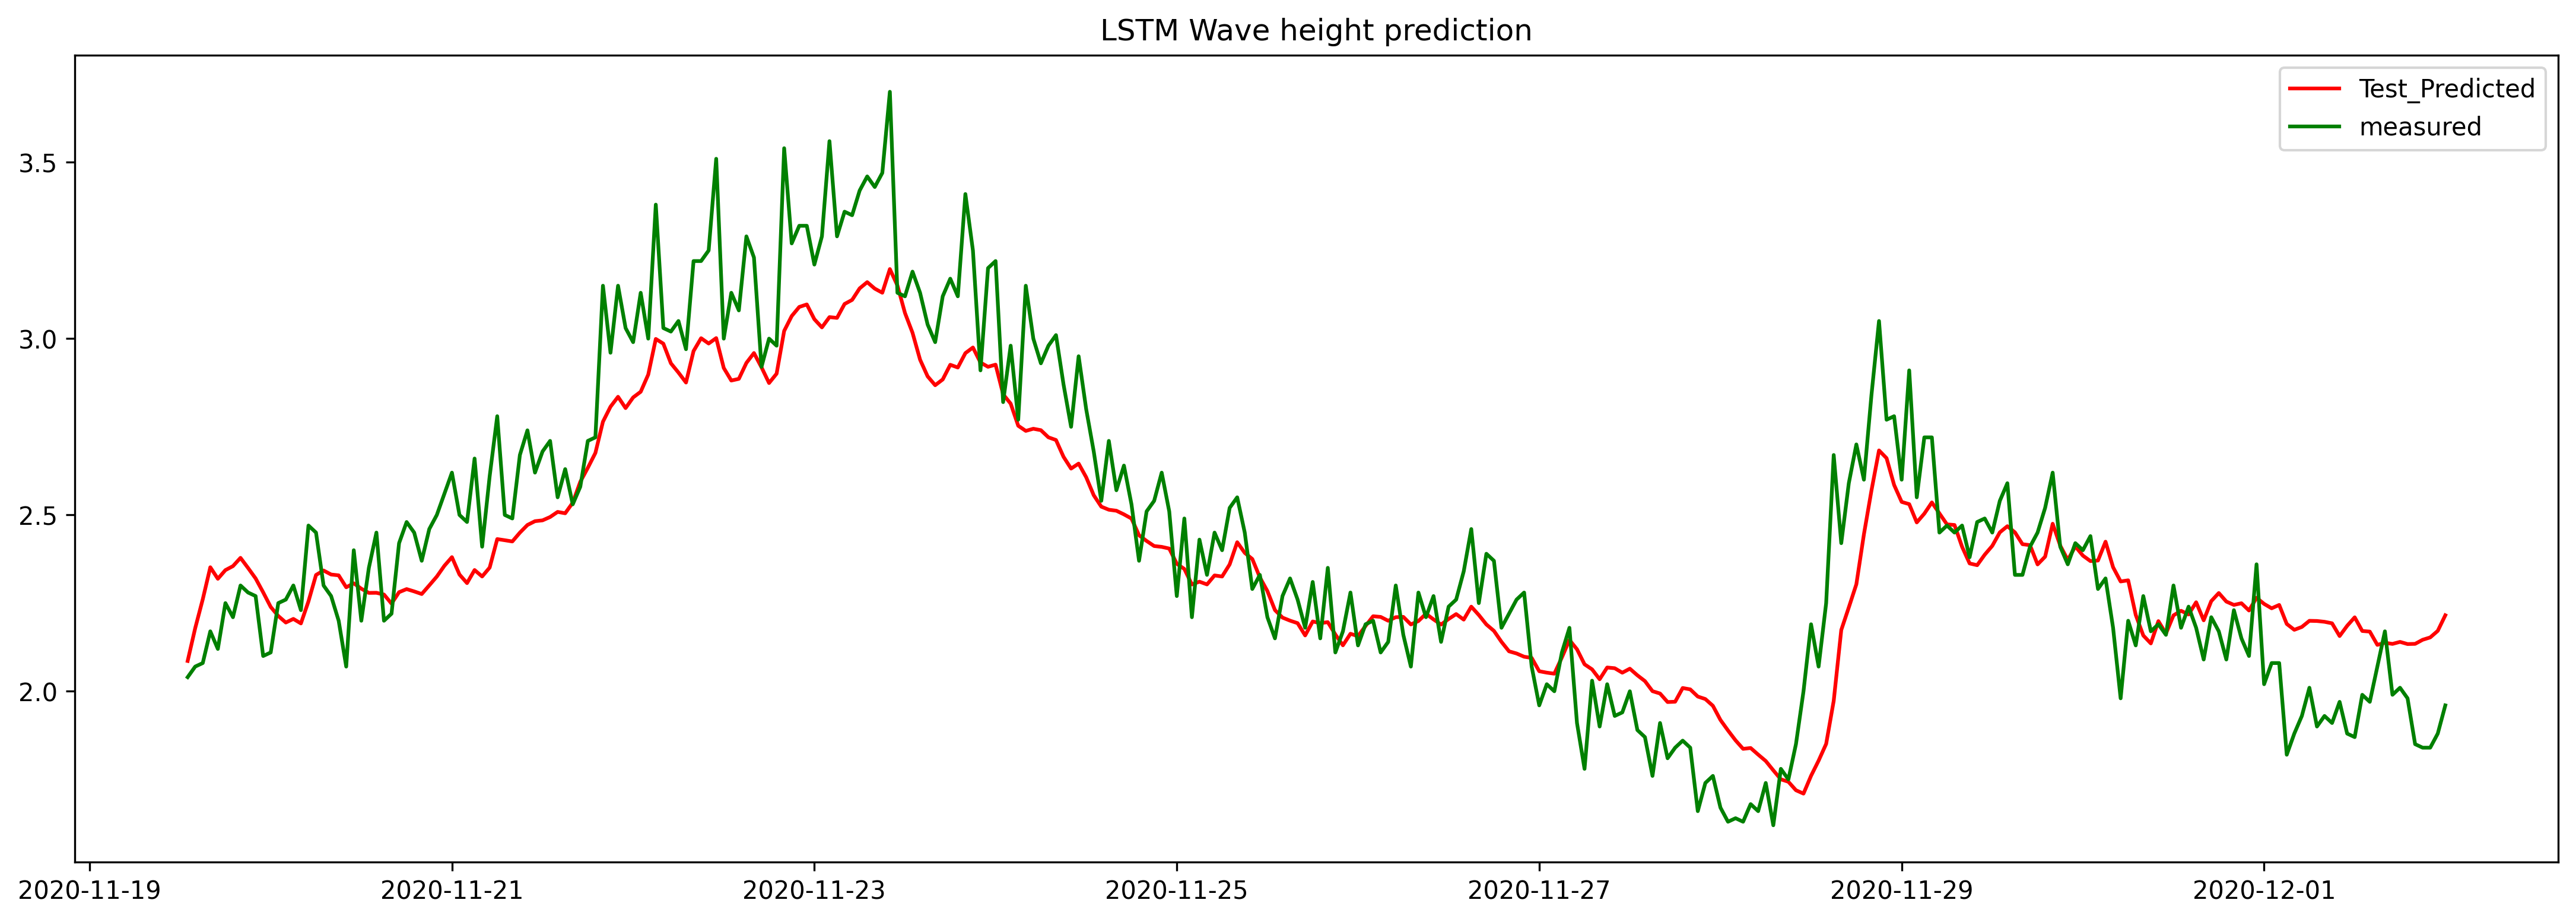

In [42]:
fig = plt.figure(figsize=(18, 6), dpi=300)
plt.plot(df2_date[46024:46324],y_train_pred[46001:46301], label='Test_Predicted', color='red')
plt.plot(df2_date[46024:46324], train['WVHT'][46024:46324], label='measured', color='green')
plt.title("LSTM Wave height prediction")
plt.legend(loc='upper right')
plt.show()

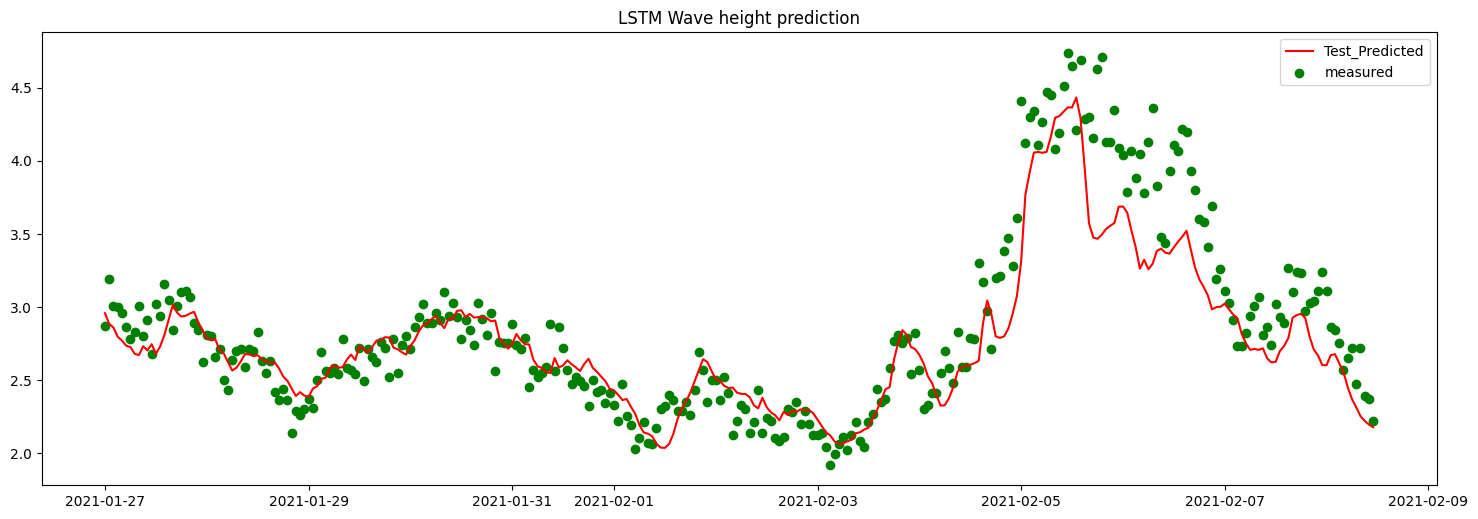

In [43]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(df2_date_test[624:924],y_pred[600:900], label='Test_Predicted', color='red')
plt.scatter(df2_date_test[624:924], test['WVHT'][624:924], label='measured', color='green')
plt.title("LSTM Wave height prediction")
plt.legend(loc='upper right')
plt.show()